# Introduction to data modelling

Almost all experiments we do in physics are designed to measure one or more physical quantities or values. Often these values do not come directly from the data, but instead are numerical parameters of some mathematical description (model) we apply to the data. In this introductory lab, you will learn and practice techniques for modelling data that you are expected to use for the other experiments (even if it not explicitly stated so in those lab scripts).

## Uncertainties

We all know a little about attaching uncertainties ("errors") to measurements, but what do we mean when we say we have measured some length to be $x = (101.7 \pm 0.5)$ mm?

## Data and models


Lets say we have performed a very simple experiment to measure the electrical resistance of a resistor. We have placed the resister in a series circuit with a power supply that delivers a fixed current that can be varied by the operator. We assume that this current is calibrated and known to very high accuracy. We have placed a voltmeter across our resistor, and we gradually vary the current. For each value of the current, $I_i$, we measure a voltage $V_i$ with an uncertainty $\sigma_i$.

Our data looks something like:





Text(0, 0.5, 'V (mV)')

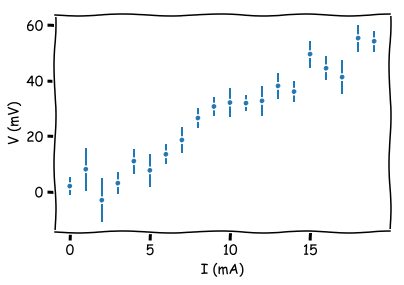

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# generate some simulated data
n_data = 20
true_resistance = 3.0
error_voltage = 5.0 + 1.5*np.random.randn(n_data)
current = np.arange(n_data)
voltage = (true_resistance * current) + error_voltage * np.random.randn(n_data)

plt.xkcd()  # makes cartoon-like plots - only for sketches, not for scientific reports!
plt.figure()
plt.errorbar(current,voltage,error_voltage,fmt='.')
plt.xlabel('I (mA)',fontsize=14)
plt.ylabel('V (mV)',fontsize=14)




We assume that our circuit follows Ohm's Law, $V = IR$.

Our mathematical model for the voltage is $m_i = I_i R$, a straight line that passes through the origin. 
In this case we have a model with one independent variable, $I$, one dependent variable (measurement), $V$, and one 
free parameter $R$. We want to find the value of the parameter $R$, that makes the model fit our data in the best way.

But what do we mean by the best way? We need some value that we can calculate that somehow encapsulates the meaning of "best". The statistic that we use is 

$\chi^2 = \sum_i \left( \frac{m_i - V_i}{\sigma_i} \right)^2$,

pronounced "kie squared". To calculate this number, for a given model, we calculate by how much each data point is different from the model, divide this number by the uncertainty, square the result, and add up the points. This is a very similar concept to a "least squares" fit, but it takes into account the error bar size, giving a higher weighting to points with small uncertainties. We define the "best fitting model" as being the one that minimizes $\chi^2$.







## Linear and nonlinear models

If our model can be written as a sum of known mathematical functions multiplied by coefficients (parameters), then it is called a linear model. For example, these are linear models:

$y = c_0 + c_1 x + c_2 x^2$, with parameters $c_0, c_1, c_2$.

$y = a_1 \sin x + a_2 \cos x$, with parameters $a_1, a_2$.

$y = a e^{-x^2/2} + b$, with parameters $a, b$.

Note how in each case there is a coefficient multiplied by a function of the independent variable - the functions themselves don't need to be linear.

Here are some examples of nonlinear models:

$y = \cos( a x)$, with parameter $a$.

$ y = a e^{bx}$, with parameters $a, b$.

A linear model has the property that, when fitted to some data by minimizing $\chi^2$, there is a single exact solution that can be obtained by linear algebra. For non-linear models, different minimization methods must be used and we have to be wary about finding solutions that are in a local $\chi^2$ minimum, but not the global minimum.



## Fitting a linear model

Since we have defined our best fitting model as being the one that minimises $\chi^2$, we can compute the solution using some calculus and algebra. Let's first take our simple example from above. In this case our parameter that we want to find is R, and

$\chi^2 = \sum_i \left( \frac{model_i - V_i}{\sigma_i} \right)^2 = \sum_i \left( \frac{I_i R - V_i}{\sigma_i} \right)^2$.

We minimise this with respect to $R$ by differentiating, and solving the resulting equation:

$\frac{\partial \chi^2}{\partial R} = 2 \sum_i \frac{(I_i R - V_i) I_i}{\sigma_i^2} = 0$.

With a little rearrangement,

$R \sum_i \frac{I_i^2}{\sigma_i^2} - \sum_i \frac{V_i I_i}{\sigma_i^2} = 0$,

and

$
R =  \frac{ \sum_i \frac{V_i I_i}{\sigma_i^2} }{ \sum_i \frac{I_i^2}{\sigma_i^2} }.
$

Lets try this with our simulated data from above:



R = 2.9844430188392677 ohms


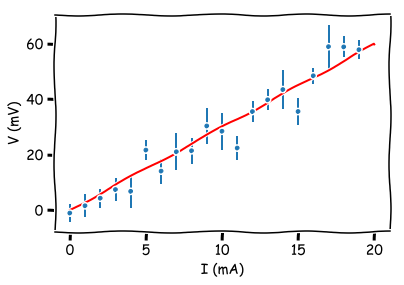

In [6]:

R = np.sum(voltage*current/error_voltage**2) / np.sum(current**2/error_voltage**2)

print('R =', R, 'ohms')

# Plot the data
plt.xkcd()
plt.figure()
plt.errorbar(current,voltage,error_voltage,fmt='.')
plt.xlabel('I (mA)',fontsize=14)
plt.ylabel('V (mV)',fontsize=14)

# Make a line to represent the model, then overplot it
x_current = np.linspace(0,20,1000)
x_model = R * x_current

plt.plot(x_current,x_model,'r-')




## Multi-parameter linear models

If our linear model has more than one parameter, then we need to minimise with respect to each one. Instead of having a single equation to solve, we end up with a set of simultaneous equations, that can be solved using matrix algebra. Here are the gory details (which you should read through but don't need to rememember):

Our linear model can be written in the form

$ m(x) = \sum_j a_j B_j(x)$,

where $a_j$ are the parameters that we want to find, and $B_j(x)$ are the functions of x that
are in our model. $B_j(x)$ are called the basis functions of the model. Then, if we have measurements
$y_i$, 

$\chi^2 = \sum_i \left( \frac{m_i - y_i}{\sigma_i} \right)^2 = \sum_i \frac{ \left( \sum_j a_j B_j(x_i) - y_i \right)^2}{\sigma_i^2}$.

Differentiating by one of the parameters, $a_k$, gives,


$\frac{\partial \chi^2}{\partial a_k} = 2 \sum_i \frac{ \left( \sum_j a_j B_j(x_i) - y_i \right) B_k(x_i)}{\sigma_i^2} = 0$,

and we have one such equation for each parameter which must be solved simultaneously. With a bit of algebra (which I'll skip over here), this set of simultaneous equations can be reduced down to a single matrix equation,

$ A . \underline{a} = \underline{b}$,

where 

$\underline{a} = [a_1, a_2, a_3, ...]$ is a vector of parameters that we want to calculate,

$A$ is a symmetric matrix with elements $A_{jk} = \sum_i \frac{ B_j(x_i) B_k(x_i)}{\sigma_i^2}$, 

and $\underline{b}$ is a vector with components 

$b_k = \sum_i \frac{ B_k(x_i) y_i}{\sigma_i^2}$.

What about uncertainties in the parameters. We won't prove it here, but it turns out that

$\sigma^2_{a_i} = A^{-1}_{ii}$.

That is, to find the uncertainties, we compute the inverse of matrix A, and take the square root of the diagonal elements.

You can see that these expressions only involve the basis functions, the measurements and their uncertainties.
They are very easy to construct and solve with a little bit of python code.

Lets see an example using a cubic polynomial model:




A
 [[ 5.55461764e+02 -7.49106970e+02  3.86351697e+03  1.57320517e+04]
 [-7.49106970e+02  3.86351697e+03  1.57320517e+04  1.94567193e+05]
 [ 3.86351697e+03  1.57320517e+04  1.94567193e+05  1.76316702e+06]
 [ 1.57320517e+04  1.94567193e+05  1.76316702e+06  1.72997910e+07]]
b
 [   -4326.50697931   -16394.88830133  -263188.68047221 -1967840.13134221]
A inv
 [[ 3.41800238e-02  1.89819027e-02  3.59880096e-05 -2.48235963e-04]
 [ 1.89819027e-02  1.23738205e-02  5.24978380e-04 -2.09932498e-04]
 [ 3.59880096e-05  5.24978380e-04  2.06482232e-04 -2.69813893e-05]
 [-2.48235963e-04 -2.09932498e-04 -2.69813893e-05  5.39451217e-06]]
p (true values)
 [20.0, -10.0, -10.0, 1.0]
a (fitted values)
 [ 19.93076736 -10.04751182 -10.01138999   1.00147318]
delta a (uncertainties)
 [0.1848784  0.11123768 0.01436949 0.00232261]


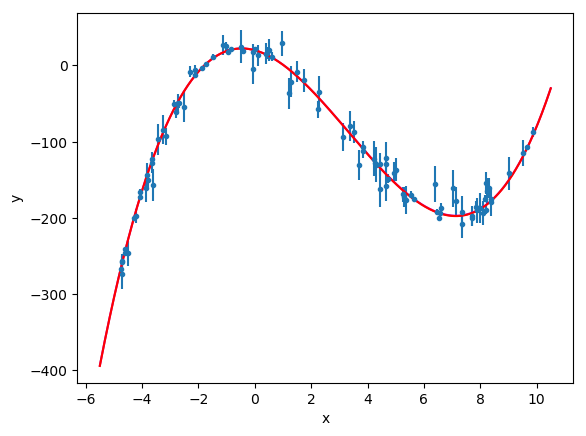

In [7]:
# It is helpful to write a function to evaluate the model
def model(p,x):
    return p[0] + p[1]*x + p[2]*x**2 + p[3]*x**3

# We will generate some simulated data

n = 100;                                   # number of data points
p = [20.0,-10.0,-10.0,1.0]                 # true polynomial coefficients

x = np.random.rand(n)*15 - 5               # random x data values in range -5 to 10
y = model(p,x)                             # true y data values

sigma = np.random.rand(n)*25               # make some random error bars in range 0 to 25
y = y + np.random.randn(n)*sigma           # add gaussian-distributed random noise 

xx = np.linspace(-5.5,10.5,1000)           # closely spaced x vector to use for plotting



#
#    plot the data points and the true cubic polynomial
#
plt.rcdefaults()  # turn off xkcd
plt.figure()
plt.errorbar(x,y,sigma,fmt='.')
plt.plot(xx,model(p,xx),'m-')
plt.xlabel('x')
plt.ylabel('y')


#
#  Now to fit a 4-coefficient polynomial (i.e. a cubic) to the data
#

#
# Define the basis functions (in this case 1, x, x^2, x^3)
# Store them in the rows of a 2-dimensional array for easy use.
#
bf = np.zeros((4,n))
bf[0,:] = x**0
bf[1,:] = x**1
bf[2,:] = x**2
bf[3,:] = x**3

#
#   create and fill the A matrix and b vector
#
A = np.zeros((4,4))
b = np.zeros(4)
for k in range(4):
    for j in range(4):
        A[k,j] = np.sum(bf[k,:]*bf[j,:]/sigma**2) 
    b[k] = np.sum(y*bf[k,:]/sigma**2)

#
#  print and plot the results
#
print('A\n', A)
print('b\n', b)

A_inv = np.linalg.inv(A)

print('A inv\n',A_inv)

a = np.linalg.solve(A,b)


print('p (true values)\n', p)  # the original coefficients
print('a (fitted values)\n', a)  # our answer

print('delta a (uncertainties)\n',np.sqrt(np.diag(A_inv)))


plt.plot(xx,model(a,xx),'r-')


## Exercise 1

The data in file "exercise1.dat" contains 3 columns of numbers, $x, y, \sigma$ that have been generated from a model

$y(x) = a_0 + a_1 \sin(x) + a_2 \cos(x) + a_3 \sin(2 x) + a_4 \cos(2 x)$.

Your tasks are to load the data, plot it, find the coefficients of the model that best fit the data, and overlay the fitted model on your plot.


Coefficients: 
[ 3.50207353  1.00323254  0.50495927  0.09218124 -0.29204997]


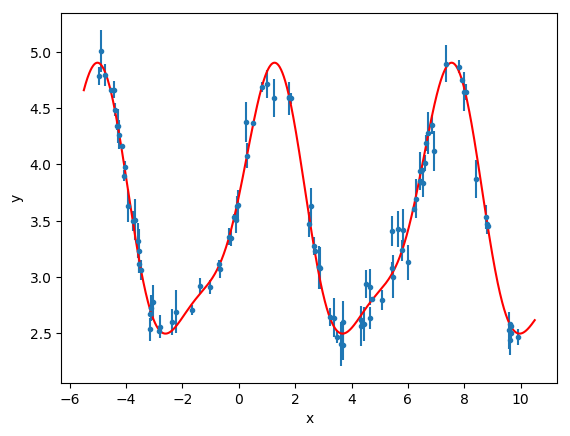

In [25]:
data = np.loadtxt("exercise1.dat")

def model(p,x):
    return p[0] + p[1]*np.sin(x) + p[2]*np.cos(x) + p[3]*np.sin(2*x) + p[4]*np.cos(2*x)

x = np.array(data[:,0])
y = np.array(data[:,1])
sigma = np.array(data[:,2])

bf = np.zeros((5,len(data)))
bf[0,:] = x**0
bf[1,:] = np.sin(x)
bf[2,:] = np.cos(x)
bf[3,:] = np.sin(2*x)
bf[4,:] = np.cos(2*x)

              
A = np.zeros((5,5))
b = np.zeros(5)
for k in range(5):
    for j in range(5):
        A[k,j] = np.sum(bf[k,:]*bf[j,:]/sigma**2) 
    b[k] = np.sum(y*bf[k,:]/sigma**2)
              
A_inv = np.linalg.inv(A)
a = np.linalg.solve(A,b)
              



plt.rcdefaults()  # turn off xkcd
plt.figure()
plt.errorbar(x,y,sigma,fmt='.')
plt.plot(xx,model(a,xx),'r-')
# plt.plot(xx,model(p,xx),'m-')
plt.xlabel('x')
plt.ylabel('y')
print("Coefficients: ")
print(a)

## Linearizable models

Sometimes non-linear models can be transformed into a linear form, e.g.

$y(x) = a_1 e^{-a_2 x^2}$

can be written as

$y'(x) = b_1 - b_2 x^2$

if we define $y' = \ln y$. The coefficients are then related by $b_1 = \ln a_1$ and $b_2 = a_2$.

In such cases, we can use the linear method above to solve the problem. One trick to be aware of when doing this is that you must also transform the uncertainties
by

$\delta y' = \frac{\partial y'}{\partial y} \delta y$.

before you do the fitting. For instance in the example given, $\delta y' = \frac{\delta y}{y}$.




## Exercise 2

Copy the file exercise2.dat from Learn to your own area. This simulated data set consists of 3 columns of numbers $(x, y, \sigma)$. Your task is to fit a power law model

$ y = A x^B$

to these data and hence derive the parameters $A$ and $B$. To do this, first transform the data and its uncertainties to a new set of variables. Plot and fit this transformed data, and make sure that this has worked. Then transform your parameters back to the original variables and plot the original data with the model overlaid.


[0.29795520982676466, 1.9034001573047021]


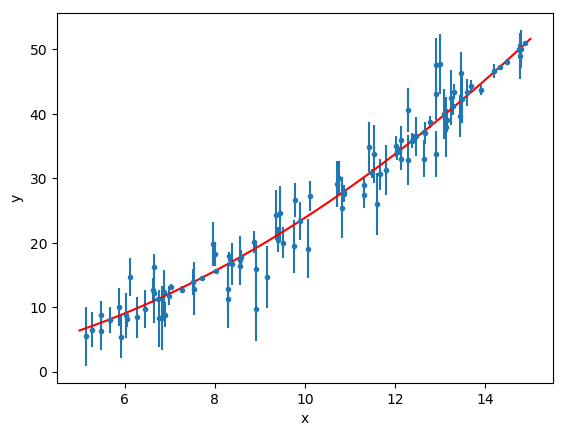

In [98]:
data2 = np.loadtxt("exercise2.dat")

def model(p,x):
    return p[0] + p[1]*np.log(x)

def power_model(z,x):
    return z[0]*(x**z[1])

x = np.array(data2[:,0])
y = np.array(data2[:,1])
y_t = np.log(y)
sigma = np.array(data2[:,2])
sigma_t = (1/y_t)*sigma


bf = np.zeros((2,len(data)))
bf[0,:] = x**0
bf[1,:] = np.log(x)

A = np.zeros((2,2))
b = np.zeros(2)
for k in range(2):
    for j in range(2):
        A[k,j] = np.sum(bf[k,:]*bf[j,:]/sigma_t**2) 
    b[k] = np.sum(y_t*bf[k,:]/sigma_t**2)
              
A_inv = np.linalg.inv(A)
a = np.linalg.solve(A,b)

power_B = a[1]
power_A = np.exp(a[0])
#print(power_A, power_B)
a = [power_A, power_B]

xx = np.linspace(5.0,15.0,1000)

plt.rcdefaults()  # turn off xkcd
plt.figure()
plt.errorbar(x,y,sigma,fmt='.')
plt.plot(xx,power_model(a,xx),'r-')
plt.xlabel('x')
plt.ylabel('y')
print(a)


## Exercise 3

Load the class data for last week's pendulum experiment (h, T and their uncertainties) from file pendulum.dat. 
The four columns are $h, \sigma_h, T, \sigma_T$. 

Familiarise yourself with the data by making a plot. Consult the documentation for plt.errorbar
to learn how to plot errorbars in both directions.

Make a plot of $hT^2$ vs $h^2$ and use this to calculate $g$ and its uncertainty.
You will probably need to refer back to equation 1.2 in the pendulum lab script to see how this works.

Note: Remember to transform uncertainties. Are the relative uncertainties larger for $h^2$ or for $hT^2$? To make the model, take the quantity with the smaller uncertainties as the independent variable (x-axis) and ignore its uncertainties. 



Calculated value of g: 9.664689526136753
Percentage Uncertainty in g: 1.447593968003819


Text(0, 0.5, '$h^2$')

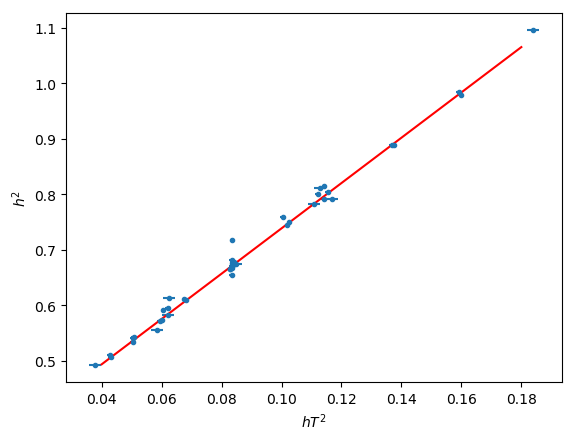

In [24]:
import numpy as np
data3 = np.loadtxt("pendulum.txt")

def model(p,x):
    return p[0] + p[1]*x

h = np.array(data3[:,0])
h_sigma = np.array(data3[:,1])
t = np.array(data3[:,2])
t_sigma = np.array(data3[:,3])

x = h**2
y = h*t**2
sigma_x = h*2*(h_sigma/h)
sigma_y = h*(t*2*(t_sigma/t))


bf = np.zeros((2,len(data3)))
bf[0,:] = x**0
bf[1,:] = x

A = np.zeros((2,2))
b = np.zeros(2)
for k in range(2):
    for j in range(2):
        A[k,j] = np.sum(bf[k,:]*bf[j,:]/sigma_y**2) 
    b[k] = np.sum(y*bf[k,:]/sigma_y**2)
              
A_inv = np.linalg.inv(A)
a = np.linalg.solve(A,b)

xx = np.linspace(0.04,0.18,1000)

grad = a[1]
g = (4*(np.pi)**2)/grad
print("Calculated value of g: "+str(g))
g_actual = 9.80665
g_unc = (g_actual-g)/g_actual
print("Percentage Uncertainty in g: "+str(g_unc*100))

plt.rcdefaults()  # turn off xkcd
plt.figure()
plt.errorbar(x,y,sigma_y,sigma_x,fmt='.')
plt.plot(xx,model(a,xx),'r-')
# plt.plot(xx,power_model(a,xx),'r-')
plt.xlabel('$hT^2$')
plt.ylabel('$h^2$')


## Non-linear models

Sometimes we come across problems that cannot be linearised. For example, stars in our galaxy and nearby galaxies can be gravitationally microlensed if another object (the lens – which may be invisible) passes almost in front of them. The geometry is shown in the figure below which represents a projection in the plane of the sky – note that the star is actually typically twice as far away as the lens. If the angular distance $u(t)$ is very small (on the order of microarcseconds) the
apparent brightness of the background (source) star is increased.

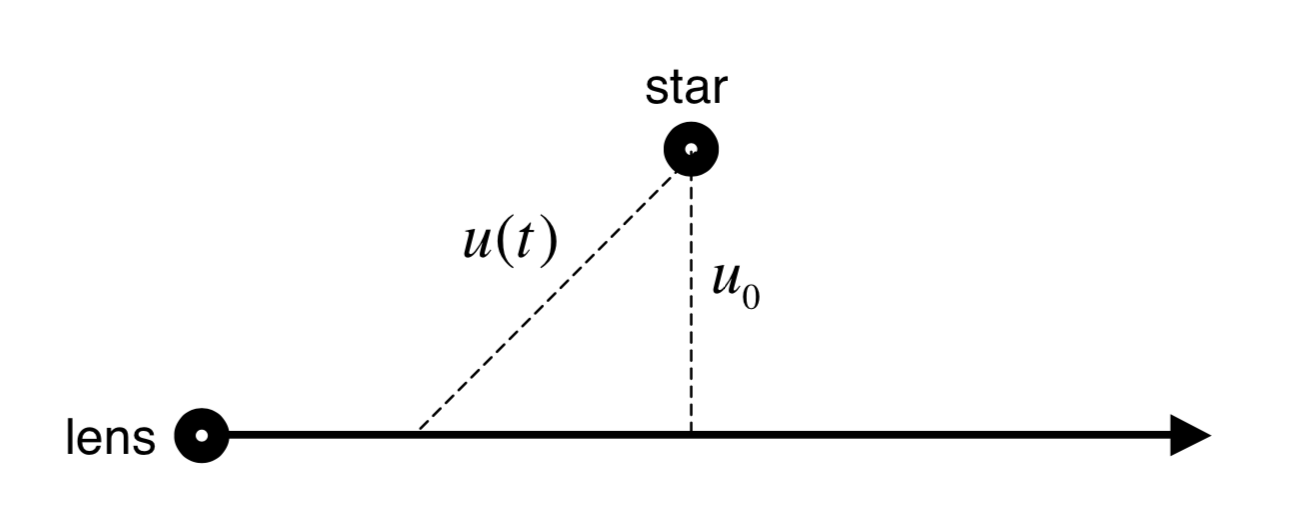

A plot of apparent brightness (magnitude - logarithmic units where larger numbers mean fainter) against time (a lightcurve) for a microlensing event is shown below. (The different coloured data points come from three different telescopes.)

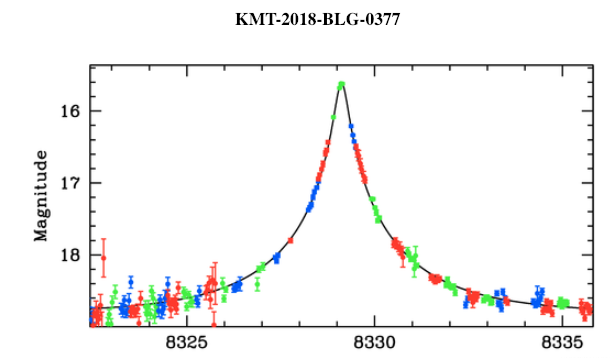

The apparent magnitude of the star as a function of time is given by

$m(t) = m_0 - 2.5  \log_{10} \left( g A(t) + (1-g) \right)$

where $A(t)$ is the magnification as a function of time, which in turn depends on $u(t)$ , the projected
separation of the star and lens-object in the plane of the sky, by

$A(u) = \frac{u^2 + 2}{u \sqrt{u^2 + 4}}$ where  $u(t) = \sqrt{ u_0^2 + \left( \frac{t-t_0}{t_E} \right)^2 }$.

The angular distance $u(t)$ is measured in units of the angular Einstein radius, $\theta_E$, a scale factor for the system that depends on the lens mass and the distances of the lens and source.

The physical model has 5 parameters: 

$u_0$, the closest projected separation

$t_0$, the time at which $u = u_0$

$t_E$, the Einstein-radius crossing time (a scale factor that depends on the relative transverse velocity of the source and lens)

$m_0$, the apparent magnitude (brightness) of the source when it is not being lensed.

$g$, a positive number > 1 that represents the fraction of blended (unlensed) light. g = 1 implies no blending.

These parameters (apart from $m_0$) cannot be written as linear coefficients of some basis functions, so is a non-linear model.

To fit non-linear models fitting methods. For now we will use a fairly general non-linear method known as the Simplex Downhill algorithm. The algorithm itself is available in python using scipy.optimize.minimize (specifying the argument, method = ‘Nelder-Mead’). See the documentation at 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html


## Exercise 4

Copy the data file KMTC15_I.pysis from Learn to your own area. This is real data for a microlensing event that was detected by the Korea Microlensing Telescope Network in 2018 (KMTNet, http://kmtnet.kasi.re.kr/kmtnet-eng/). The data file contains three columns of numbers representing time, magnitude and uncertainty. The times are "heliocentric Julian dates", a system that counts days since 1 January 4713 BC. To make the date numbers easier to use, a constant of 2450000 has been pre-subtracted.


Read the data into python and make a plot of the lightcurve.
Note that you can invert the y-axis to make brighter be in the upwards direction using plt.gca().invert_yaxis().




Your task is to fit a microlensing model to this data and hence determine the parameters. There is of course more than one way to complete this task but the following series of steps is recommended. 

First write a function that takes as its arguments a set of microlensing parameters and a set of time values. The function should compute the values of the apparent magnitude at the given time values. For example, your function may look something like


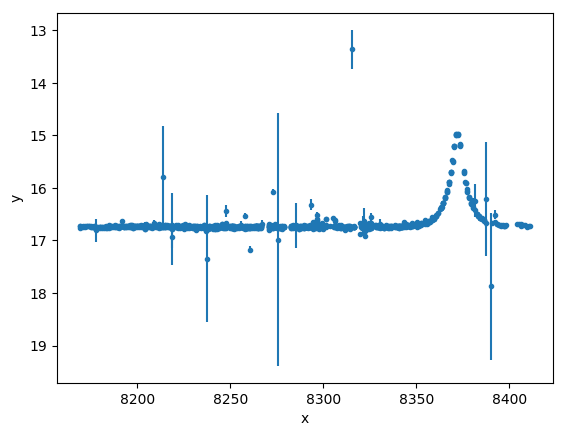

In [37]:
kmt = np.loadtxt("KMTC15_I.pysis")
time = np.array(kmt[:,0])
magnitude = np.array(kmt[:,1])
unc = np.array(kmt[:,2])

plt.rcdefaults() # turn off xkcd
plt.figure()
plt.gca().invert_yaxis()
plt.errorbar(time,magnitude,unc,fmt='.')
plt.xlabel('x')
plt.ylabel('y')

def u(t, u0, t0, tE):
    return np.sqrt(u0**2+((t-t0)/tE)**2)

def A(u):
    return (u**2+2)/(u*np.sqrt(u**2+4))



def mlens(params,t):
    """Function to compute the brightness of a microlensing event.
    
    Input variables:
    
        params: a python list of 4 model parameters representing m0, u0, t0, tE
        
        t: a numpy array of time values at which to compute the brightness
        
    Returns:
    
        a numpy array of brighness corresponding to each time in t      
    """
    
    
    m0, u0, t0, tE, g = params
    
    brightness = m0 - 2.5*np.log10(g*A(u(t, u0, t0, tE))+(1-g))
    
    return brightness


Test your function by giving it various sets of trial values and plotting the results. Note how the parameters correspond to features on the plot. For example

Text(0, 0.5, 'brightness')

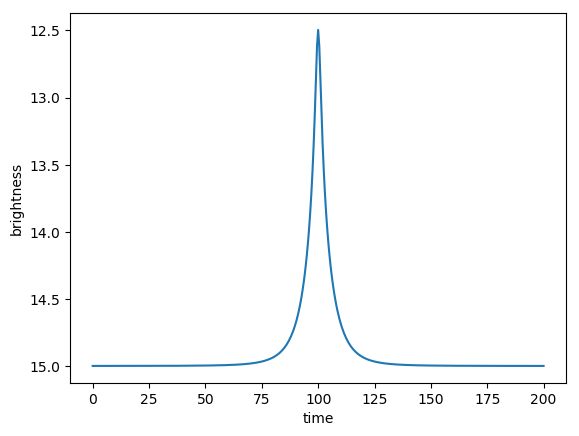

In [42]:
time = np.linspace(0,200,401)
parameters = [15.0,0.1,100,10,1]
magnitude = mlens(parameters,time)

plt.figure()
plt.plot(time,magnitude)
plt.gca().invert_yaxis()
plt.xlabel('time')
plt.ylabel('brightness')



To use scipy.optimize.minimize to find the parameters for a set of experimental data, you must first write a function that takes as its arguments the 4 microlensing parameters and returns a value for $\chi^2$. You can use your mlens function from above to help
compute $\chi^2$. 

Your function should take as input a set of parameters and an N x 3 numpy array of times, measured brightness values and uncertainties.

To pass the data to the function when using scipy.optimize.minimize, you add
an "args" argument to the function call.

For example, your $\chi^2$ function may look something like:

In [73]:
from scipy.stats import chisquare

def chi2(params, data):
    """Function to compute chi-squared"""

    t = data[:,0]
    y = data[:,1]
    #sigma = data [:,2]
    
    expected = mlens(params, t)
    return chisquare(y, expected)[0]

    # Add some lines to compute and return chi^2.
    # Make use of your mlens function.
    
print(chi2(parameters, kmt))

236.53787700141456


You can now find the model parameters for your data by calling scipy.optimize.minimize, passing it the name of your function and a vector of values that are initial guesses for the parameters. The revised values of the parameters that minimise the function will be returned.
Remember to pass your data in using the 'args' argument, and to specify the argument, method = ‘Nelder-Mead’. You will need some lines of code like:


[ 0.12538383  1.73175753  2.86805617 32.564406   10.60510522]
[ 1.67361980e+01 -2.45774327e-01  8.37210887e+03  8.23513736e+00
  1.31830353e+00]


Text(0, 0.5, 'Brightness')

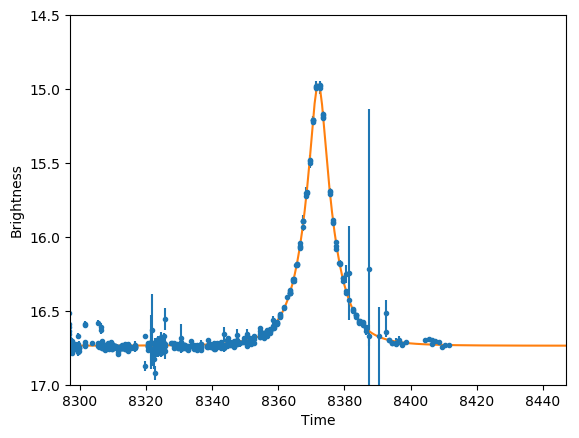

In [83]:
from scipy.optimize import minimize

guessparams = [15.0,0.1,8375,10,1] # put some sensible numbers here

result = minimize(chi2,guessparams, method='BFGS',args=(kmt))
param_unc = np.sqrt(2*np.diag(result.hess_inv))
print(param_unc)
newparams = result.x

print(newparams)

time = np.linspace(8200,8500,401)
magnitude = mlens(newparams,time)


plt.rcdefaults()
plt.figure()

plt.gca().invert_yaxis()
plt.errorbar(kmt[:,0],kmt[:,1],kmt[:,2],fmt='.')
plt.plot(time,magnitude)
xspread = 75 # x value before and after center of spike
plt.xlim(newparams[2]-xspread,newparams[2]+xspread)
plt.ylim(17,14.5)

plt.xlabel('Time')
plt.ylabel('Brightness')


Note that your initial guess shouldn’t be too far away from the true solution or else the algorithm won’t converge. You can find approximate parameter values to use as the starting guess by overplotting the data with curves generated by trail and error parameters. 


Make a plot of your data, with the model corresponding to your initial parameter guess overlaid, and also the minimum-$\chi^2$ model.



Uncertainties in non-linear parameter values are more complicated than in the linear case. As long as the parameters are not strongly correlated, a good approximation to the parameter uncertainties can be obtained from the Hessian matrix, $H$ , which is the matrix of second partial derivatives of $\chi^2$ with respect to each of the parameters. i.e.

$H_{ij} \equiv \frac{\partial^2 \chi^2}{\partial a_i \partial a_j}$.

The uncertainty estimates are found by inverting $H$ and taking the square root of the diagonal elements, i.e.

$\sigma^2_{a_i} = \left[ \frac{1}{2} H \right]^{-1}_{ii}$.

In python, scipy.optimize.minimize does return the inverse Hessian matrix (result.hess_inv) if we use method=’BFGS’ instead of method='Nelder-Mead'. We can extract the parameter uncertinties with np.sqrt(2*np.diag(result.hess_inv)). Try it.
